In [45]:
import numpy as np
from mne.preprocessing import peak_finder
import matplotlib.pyplot as plt

t = np.arange(0, 3, 0.01)
sin_signal = np.sin(np.pi*t) - np.sin(0.5*np.pi*t)
peak_locs, peak_mags = peak_finder(sin_signal) 
print(peak_locs)
print(peak_mags)

Found 2 significant peaks
[ 36 260]
[0.36900026 1.76007351]


In [46]:
def find_peaks(signal, min_distance=1):
    """
    Find peaks in a 1D array.
    
    Parameters
    ----------
    signal       : 1D array
    min_distance : minimum distance between peaks in signal

    Returns
    -------
    ind : 1D array
        indices of the peaks in `signal`
    
    """
    size = signal.size
    
    # Padding the begginning and end of the signal with a value
    # this makes sure that the first and last values of the signal are not peaks
    # and fixes out-of-bound errors
    pad = np.zeros(size+2*min_distance)
    pad[:min_distance] = signal[0]-1.e-5
    pad[-min_distance:] = signal[-1]-1.e-5
    pad[min_distance:min_distance+size] = signal

    # Any value could be a peak candidate
    peak_candidate_bools = np.zeros(size)
    peak_candidate_bools[:] = True
    
    for i in range(min_distance):
        start_before = min_distance - i - 1
        start_central = min_distance
        start_after = min_distance + i + 1

        x_before = pad[start_before : start_before + size]
        x_central = pad[start_central : start_central + size]
        x_after = pad[start_after : start_after + size]

        # A point is a peak candidate if it is larger than the points before and after it
        #   x_central > x_before and x_central > x_after
        peak_candidate_bools = np.logical_and(peak_candidate_bools, np.logical_and(x_central > x_before, x_central > x_after))

    # Find the indices of the peak candidates
    #   non-zero values of peak_candidate are the indices of the peaks
    ind = np.argwhere(peak_candidate_bools)
    ind = ind.reshape(ind.size)

    return ind


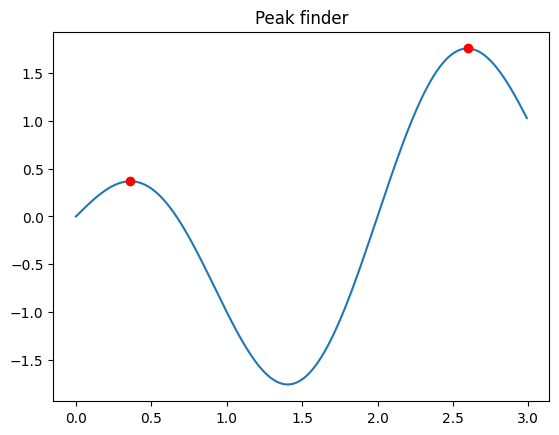

In [49]:
min_distance = 1
peaks = find_peaks(pad, min_distance) 
plt.plot(t, pad)
plt.plot(t[peaks], pad[peaks], 'ro')
plt.title('Peak finder')
plt.show()